In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train = pd.read_csv('./data/train.csv')
labels = pd.read_csv('./data/train_labels.csv')
test = pd.read_csv('./data/test.csv')
submission = pd.read_csv('./data/sample_submission.csv')

In [3]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 200

train

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296941,22100221145014656,1600,5483231,navigate_click,undefined,22,NaN,343.887291,36.701026,483.0,273.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296942,22100221145014656,1601,5485166,navigate_click,undefined,22,NaN,332.696070,141.493178,545.0,221.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296943,22100221145014656,1602,5485917,navigate_click,undefined,22,NaN,369.912859,140.569205,611.0,217.0,NaN,NaN,NaN,tunic.capitol_2.hall,NaN,0,0,1,13-22
26296944,22100221145014656,1603,5486753,navigate_click,undefined,22,NaN,252.299653,123.805889,526.0,232.0,NaN,NaN,chap4_finale_c,tunic.capitol_2.hall,NaN,0,0,1,13-22


In [4]:
train.shape

(26296946, 20)

In [5]:
labels.shape

(424116, 2)

In [6]:
train['session_id'].nunique()

23562

There are total 23562 sessions for train. For each sessions, there are 18 questions. Thus 25362 * 18 = 424116.

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      int64  
 1   index           int64  
 2   elapsed_time    int64  
 3   event_name      object 
 4   name            object 
 5   level           int64  
 6   page            float64
 7   room_coor_x     float64
 8   room_coor_y     float64
 9   screen_coor_x   float64
 10  screen_coor_y   float64
 11  hover_duration  float64
 12  text            object 
 13  fqid            object 
 14  room_fqid       object 
 15  text_fqid       object 
 16  fullscreen      int64  
 17  hq              int64  
 18  music           int64  
 19  level_group     object 
dtypes: float64(6), int64(7), object(7)
memory usage: 3.9+ GB


In [8]:
train.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
count,2.629695e+07,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06,2.629695e+07,2.629695e+07,2.629695e+07
mean,2.113249e+16,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490579e+01,-1.162119e+02,4.584098e+02,3.855860e+02,3.471003e+03,1.370037e-01,1.202047e-01,9.293778e-01
std,5.712953e+14,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05,3.438513e-01,3.252008e-01,2.561926e-01
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181623e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101022e+16,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01,0.000000e+00,0.000000e+00,1.000000e+00
50%,2.104021e+16,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02,0.000000e+00,0.000000e+00,1.000000e+00
75%,2.110052e+16,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03,0.000000e+00,0.000000e+00,1.000000e+00
max,2.210022e+16,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08,1.000000e+00,1.000000e+00,1.000000e+00


Data Description:

- session_id - the ID of the session the event took place in
- index - the index of the event for the session
- elapsed_time - how much time has passed (in milliseconds) between the start of the session and when the event was recorded
- event_name - the name of the event type
- name - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)
- level - what level of the game the event occurred in (0 to 22)
- page - the page number of the event (only for notebook-related events)
- room_coor_x - the coordinates of the click in reference to the in-game room (only for click events)
- room_coor_y - the coordinates of the click in reference to the in-game room (only for click events)
- screen_coor_x - the coordinates of the click in reference to the player’s screen (only for click events)
- screen_coor_y - the coordinates of the click in reference to the player’s screen (only for click events)
- hover_duration - how long (in milliseconds) the hover happened for (only for hover events)
- text - the text the player sees during this event
- fqid - the fully qualified ID of the event
- room_fqid - the fully qualified ID of the room the event took place in
- text_fqid - the fully qualified ID of the
- fullscreen - whether the player is in fullscreen mode
- hq - whether the game is in high-quality
- music - whether the game music is on or off
- level_group - which group of levels - and group of questions - this row belongs to (0-4, 5-12, 13-22)

Based on description what are the possible ideas?

- room_coor / screen_coor  => combine with click events? as it is only associate with click events
- hover duation = > combine with hover event? as it is only associate with hover events.
- can we create new feature out of click events + coor or hover with hover duration?
- can we simplify the room id?
- how can we make feature out of text? Text will be long and there will be many unique texts
- will there be any important texts that might give hints or answer to the questions?
- may be the elapsed time spend on that text helps?
- times spent on notes to look at the hints might be important?

In [9]:
train['level'].nunique()

23

In [10]:
train['level'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22], dtype=int64)

In [58]:
train[(train['session_id'] == 20090312431273200) & (train['level_group'] == '0-4')]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,historicalsociety_closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,historicalsociety_closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,historicalsociety_closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,historicalsociety_closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,historicalsociety_closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
5,20090312431273200,5,3423,person_click,basic,0,NaN,-412.991405,-157.314686,381.0,492.0,NaN,"Sure thing, Jo. Grab your notebook and come up...",gramps,historicalsociety_closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
6,20090312431273200,6,5197,person_click,basic,0,NaN,478.485079,-199.971679,593.0,485.0,NaN,"See you later, Teddy.",teddy,historicalsociety_closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
7,20090312431273200,7,6180,person_click,basic,0,NaN,503.355128,-168.619913,609.0,453.0,NaN,I get to go to Gramps's meeting!,teddy,historicalsociety_closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
8,20090312431273200,8,7014,person_click,basic,0,NaN,510.733442,-157.720642,615.0,442.0,NaN,Now where did I put my notebook?,teddy,historicalsociety_closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4
9,20090312431273200,9,7946,person_click,basic,0,NaN,512.048005,-153.743631,616.0,438.0,NaN,\u00f0\u0178\u02dc\u00b4,teddy,historicalsociety_closet,tunic.historicalsociety.closet.teddy.intro_0_cs_0,0,0,1,0-4


In [12]:
labels[['session_id', 'question_number']] = labels['session_id'].str.split('_', 1, expand=True)

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_32812\1367698561.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  labels[['session_id', 'question_number']] = labels['session_id'].str.split('_', 1, expand=True)


In [13]:
labels[labels['session_id'] == '20090312431273200']

,session_id,correct,question_number
0,20090312431273200,1,q1
23562,20090312431273200,1,q2
47124,20090312431273200,1,q3
70686,20090312431273200,1,q4
94248,20090312431273200,1,q5
117810,20090312431273200,1,q6
141372,20090312431273200,1,q7
164934,20090312431273200,1,q8
188496,20090312431273200,1,q9
212058,20090312431273200,1,q10


Challenge 1 : How to determine question number out of 22 levels?
- 0-4 level -> question 1-3
- 5-12 level -> question 4-13
- 13-22 level -> question 14-18

In [14]:
cat_cols = [col for col in train.columns if train.dtypes[col] == np.object_]
num_cols = [col for col in train.columns if train.dtypes[col] == np.int64 or train.dtypes[col] == np.float64]

Missing Value

In [15]:
train.isnull().sum()

session_id               0
index                    0
elapsed_time             0
event_name               0
name                     0
level                    0
page              25732402
room_coor_x        2073272
room_coor_y        2073272
screen_coor_x      2073272
screen_coor_y      2073272
hover_duration    24294702
text              16679807
fqid               8274415
room_fqid                0
text_fqid         16679702
fullscreen               0
hq                       0
music                    0
level_group              0
dtype: int64

Categorical

In [16]:
train[cat_cols].head()

,event_name,name,text,fqid,room_fqid,text_fqid,level_group
0,cutscene_click,basic,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0-4
1,person_click,basic,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
2,person_click,basic,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
3,person_click,basic,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4
4,person_click,basic,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0-4


In [17]:
for col in cat_cols:
    print(f"{col} has {train[col].nunique()} unique values")

event_name has 11 unique values
name has 6 unique values
text has 597 unique values
fqid has 128 unique values
room_fqid has 19 unique values
text_fqid has 126 unique values
level_group has 3 unique values


In [18]:
train['event_name'].unique()

array(['cutscene_click', 'person_click', 'navigate_click',
       'observation_click', 'notification_click', 'object_click',
       'object_hover', 'map_hover', 'map_click', 'checkpoint',
       'notebook_click'], dtype=object)

In [19]:
train['event_name'].value_counts()

navigate_click        11326433
person_click           6052853
cutscene_click         2703035
object_click           2198211
object_hover           1057085
map_hover               945159
notification_click      649001
notebook_click          564544
map_click               517242
observation_click       212355
checkpoint               71028
Name: event_name, dtype: int64

In [20]:
train['name'].unique()

array(['basic', 'undefined', 'close', 'open', 'prev', 'next'],
      dtype=object)

In [21]:
train['name'].value_counts()

undefined    12705785
basic        12648469
close          676696
open           235139
prev            19250
next            11607
Name: name, dtype: int64

In [22]:
train['room_fqid'].unique()

array(['tunic.historicalsociety.closet',
       'tunic.historicalsociety.basement',
       'tunic.historicalsociety.entry',
       'tunic.historicalsociety.collection',
       'tunic.historicalsociety.stacks', 'tunic.kohlcenter.halloffame',
       'tunic.capitol_0.hall', 'tunic.historicalsociety.closet_dirty',
       'tunic.historicalsociety.frontdesk',
       'tunic.humanecology.frontdesk', 'tunic.drycleaner.frontdesk',
       'tunic.library.frontdesk', 'tunic.library.microfiche',
       'tunic.capitol_1.hall', 'tunic.historicalsociety.cage',
       'tunic.historicalsociety.collection_flag', 'tunic.wildlife.center',
       'tunic.flaghouse.entry', 'tunic.capitol_2.hall'], dtype=object)

In [23]:
train['room_fqid'].value_counts()

tunic.historicalsociety.entry              3622003
tunic.wildlife.center                      3013154
tunic.historicalsociety.cage               2352083
tunic.library.frontdesk                    2145666
tunic.historicalsociety.frontdesk          1943066
tunic.historicalsociety.stacks             1794007
tunic.historicalsociety.closet_dirty       1568994
tunic.humanecology.frontdesk               1326890
tunic.historicalsociety.basement           1168090
tunic.kohlcenter.halloffame                1096872
tunic.library.microfiche                    995674
tunic.drycleaner.frontdesk                  981451
tunic.historicalsociety.collection          957400
tunic.historicalsociety.closet              857273
tunic.flaghouse.entry                       833793
tunic.historicalsociety.collection_flag     452397
tunic.capitol_1.hall                        445569
tunic.capitol_0.hall                        416469
tunic.capitol_2.hall                        326095
Name: room_fqid, dtype: int64

In [24]:
train['room_fqid'] = train['room_fqid'].str.replace('tunic.', '').str.replace('.', '_')

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_32812\1113589516.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  train['room_fqid'] = train['room_fqid'].str.replace('tunic.', '').str.replace('.', '_')
C:\Users\Yuchie\AppData\Local\Temp\ipykernel_32812\1113589516.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['room_fqid'] = train['room_fqid'].str.replace('tunic.', '').str.replace('.', '_')


In [39]:
train['room_fqid'].value_counts()

historicalsociety_entry              3622003
wildlife_center                      3013154
historicalsociety_cage               2352083
library_frontdesk                    2145666
historicalsociety_frontdesk          1943066
historicalsociety_stacks             1794007
historicalsociety_closet_dirty       1568994
humanecology_frontdesk               1326890
historicalsociety_basement           1168090
kohlcenter_halloffame                1096872
library_microfiche                    995674
drycleaner_frontdesk                  981451
historicalsociety_collection          957400
historicalsociety_closet              857273
flaghouse_entry                       833793
historicalsociety_collection_flag     452397
capitol_1_hall                        445569
capitol_0_hall                        416469
capitol_2_hall                        326095
Name: room_fqid, dtype: int64

room_fqid seems like a location. We can maybe simplify them.

majority of room fqid is in historicalsociety.

'tunic.historicalsociety.closet',
'tunic.historicalsociety.basement',
'tunic.historicalsociety.entry',
'tunic.historicalsociety.collection',
'tunic.historicalsociety.stacks',
'tunic.historicalsociety.closet_dirty',
'tunic.historicalsociety.frontdesk',
'tunic.historicalsociety.cage',
'tunic.historicalsociety.collection_flag',
'tunic.kohlcenter.halloffame',
'tunic.capitol_0.hall',
'tunic.humanecology.frontdesk',
'tunic.drycleaner.frontdesk',
'tunic.library.frontdesk',
'tunic.library.microfiche',
'tunic.capitol_1.hall',
'tunic.wildlife.center',
'tunic.flaghouse.entry',
'tunic.capitol_2.hall'

In [26]:
train['fqid'].unique()

array(['intro', 'gramps', 'teddy', 'photo', nan, 'notebook',
       'retirement_letter', 'tobasement', 'janitor', 'toentry',
       'groupconvo', 'report', 'boss', 'wells', 'directory',
       'tocollection', 'cs', 'tunic', 'tunic.hub.slip', 'tostacks',
       'outtolunch', 'tocloset', 'tomap', 'tunic.historicalsociety',
       'tunic.kohlcenter', 'plaque', 'plaque.face.date', 'togrampa',
       'tunic.capitol_0', 'chap1_finale', 'chap1_finale_c',
       'tocloset_dirty', 'what_happened', 'trigger_scarf',
       'trigger_coffee', 'tunic.capitol_1', 'tofrontdesk', 'archivist',
       'magnify', 'tunic.humanecology', 'worker', 'businesscards',
       'businesscards.card_0.next', 'businesscards.card_1.next',
       'businesscards.card_bingo.next', 'businesscards.card_bingo.bingo',
       'tohallway', 'tunic.drycleaner', 'logbook', 'logbook.page.bingo',
       'tunic.library', 'tomicrofiche', 'reader', 'reader.paper0.next',
       'reader.paper1.next', 'reader.paper2.bingo', 'wellsbadge',


In [43]:
train['fqid'].nunique()

128

In [27]:
train['text_fqid'].unique()

array(['tunic.historicalsociety.closet.intro',
       'tunic.historicalsociety.closet.gramps.intro_0_cs_0',
       'tunic.historicalsociety.closet.teddy.intro_0_cs_0', nan,
       'tunic.historicalsociety.closet.teddy.intro_0_cs_5',
       'tunic.historicalsociety.closet.photo',
       'tunic.historicalsociety.closet.notebook',
       'tunic.historicalsociety.closet.retirement_letter.hub',
       'tunic.historicalsociety.basement.janitor',
       'tunic.historicalsociety.entry.groupconvo',
       'tunic.historicalsociety.entry.boss.talktogramps',
       'tunic.historicalsociety.entry.wells.talktogramps',
       'tunic.historicalsociety.collection.cs',
       'tunic.historicalsociety.collection.tunic.slip',
       'tunic.historicalsociety.collection.gramps.found',
       'tunic.historicalsociety.stacks.outtolunch',
       'tunic.kohlcenter.halloffame.plaque.face.date',
       'tunic.kohlcenter.halloffame.togrampa',
       'tunic.capitol_0.hall.boss.talktogramps',
       'tunic.historica

In [28]:
train['text'].unique()

array(['undefined', 'Whatcha doing over there, Jo?',
       'Just talking to Teddy.', 'I gotta run to my meeting!',
       'Can I come, Gramps?',
       'Sure thing, Jo. Grab your notebook and come upstairs!',
       'See you later, Teddy.', "I get to go to Gramps's meeting!",
       'Now where did I put my notebook?', '\\u00f0\\u0178\\u02dc\\u00b4',
       nan, 'I love these photos of me and Teddy!', 'Found it!',
       'Gramps is in trouble for losing papers?', "This can't be right!",
       'Gramps is a great historian!', "Hmm. Button's still not working.",
       "Let's get started. The Wisconsin Wonders exhibit opens tomorrow!",
       'Who wants to investigate the shirt artifact?',
       "Not Leopold here. He's been losing papers lately.", 'Hey!',
       "It's true, they do keep going missing lately.", 'See?',
       'Besides, I already figured out the shirt.',
       "It's a women's basketball jersey!", 'That settles it.',
       'Wells, finish up your report.',
       "Leopold

Maybe its good to do some nlp analysis on texts. We can try extract key words.
And maybe make binary feature? or some other features rather than raw texts.

Potential Ideas on Texts:
- run tfidf to see what are the key words being used
- See which texts have been spent most time
- Can we extract text into some sort of categorical or binary?

For baseline, fqid, text_fqid, text are not going to be used. We may need more feature engineering for it.

Numerical

In [29]:
train[num_cols].head()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,fullscreen,hq,music
0,20090312431273200,0,0,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,0,0,1
1,20090312431273200,1,1323,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,0,0,1
2,20090312431273200,2,831,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,0,0,1
3,20090312431273200,3,1147,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,0,0,1
4,20090312431273200,4,1863,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,0,0,1


We have to group the session_id and use it as index. And we should group them by level group. 

In [30]:
train['page'].unique()

array([nan,  0.,  1.,  3.,  4.,  5.,  6.,  2.])

In [51]:
train['page'].value_counts()

5.0    101171
1.0     99900
6.0     90743
4.0     88197
0.0     73485
3.0     62565
2.0     48483
Name: page, dtype: int64

In [61]:
train[(train['page'].notnull())] 

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
941,20090312433251036,60,60743,notebook_click,open,2,0.0,-1112.320519,-518.582269,30.0,639.0,NaN,NaN,NaN,historicalsociety_entry,NaN,0,0,0,0-4
942,20090312433251036,61,61761,notebook_click,close,2,0.0,73.221989,428.191813,789.0,58.0,NaN,NaN,NaN,historicalsociety_entry,NaN,0,0,0,0-4
1079,20090312433251036,209,351064,notebook_click,open,6,1.0,-490.732665,-429.718879,61.0,629.0,NaN,NaN,NaN,historicalsociety_basement,NaN,0,0,0,5-12
1080,20090312433251036,210,354779,notebook_click,basic,6,1.0,-97.641756,-304.264333,343.0,539.0,NaN,NaN,NaN,historicalsociety_basement,NaN,0,0,0,5-12
1081,20090312433251036,211,357947,notebook_click,close,6,1.0,556.115820,342.523546,812.0,75.0,NaN,NaN,NaN,historicalsociety_basement,NaN,0,0,0,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296901,22100221145014656,1560,5404315,notebook_click,close,21,6.0,266.576557,260.000000,811.0,70.0,NaN,NaN,NaN,historicalsociety_frontdesk,NaN,0,0,1,13-22
26296932,22100221145014656,1591,5472007,notebook_click,open,22,6.0,-339.856531,-309.145860,73.0,628.0,NaN,NaN,NaN,historicalsociety_stacks,NaN,0,0,1,13-22
26296933,22100221145014656,1592,5473806,notebook_click,basic,22,6.0,35.565876,-202.179365,469.0,515.0,NaN,NaN,NaN,historicalsociety_stacks,NaN,0,0,1,13-22
26296934,22100221145014656,1593,5474807,notebook_click,basic,22,6.0,330.938324,275.636632,765.0,37.0,NaN,NaN,NaN,historicalsociety_stacks,NaN,0,0,1,13-22


In [62]:
train[(train['hover_duration'].notnull())] 

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
49,20090312431273200,49,52328,object_hover,basic,1,NaN,NaN,NaN,NaN,NaN,7899.0,NaN,groupconvo,historicalsociety_entry,NaN,0,0,1,0-4
82,20090312431273200,82,87242,object_hover,basic,2,NaN,NaN,NaN,NaN,NaN,400.0,NaN,tunic,historicalsociety_collection,NaN,0,0,1,0-4
87,20090312431273200,87,92242,object_hover,undefined,2,NaN,NaN,NaN,NaN,NaN,3949.0,NaN,tunic.hub.slip,historicalsociety_collection,NaN,0,0,1,0-4
127,20090312431273200,127,135124,map_hover,basic,3,NaN,NaN,NaN,NaN,NaN,234.0,NaN,tunic.historicalsociety,historicalsociety_entry,NaN,0,0,1,0-4
128,20090312431273200,128,135256,map_hover,basic,3,NaN,NaN,NaN,NaN,NaN,17.0,NaN,tunic.kohlcenter,historicalsociety_entry,NaN,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296926,22100221145014656,1585,5447168,object_hover,undefined,21,NaN,NaN,NaN,NaN,NaN,99.0,NaN,journals_flag.pic_2.next,historicalsociety_stacks,NaN,0,0,1,13-22
26296928,22100221145014656,1587,5448152,object_hover,undefined,21,NaN,NaN,NaN,NaN,NaN,565.0,NaN,journals_flag.pic_2.next,historicalsociety_stacks,NaN,0,0,1,13-22
26296929,22100221145014656,1588,5466868,object_hover,undefined,21,NaN,NaN,NaN,NaN,NaN,150.0,NaN,journals_flag.pic_0.next,historicalsociety_stacks,NaN,0,0,1,13-22
26296938,22100221145014656,1597,5482022,map_hover,basic,22,NaN,NaN,NaN,NaN,NaN,1200.0,NaN,tomap,historicalsociety_entry,NaN,0,0,1,13-22


# Data visualization

For this we might need to perform groupby to have better visualization.
In order to get more insight on click duration or hover duration, it makes more sense to look at their times for those specific events.

In [31]:
elapsed_time_level_group = train.groupby(['session_id', 'level_group'])['elapsed_time'].sum()

In [32]:
elapsed_time_level_group = elapsed_time_level_group.reset_index()

In [33]:
elapsed_time_level_group.set_index('session_id')

,level_group,elapsed_time
session_id,,
20090312431273200,0-4,14155937
20090312431273200,13-22,437052322
20090312431273200,5-12,105732736
20090312433251036,0-4,13571045
20090312433251036,13-22,3241011333
...,...,...
22100219442786200,13-22,406891805
22100219442786200,5-12,107476420
22100221145014656,0-4,42961793


Using this method, we should iterate for each level_groups. 
- 0-4
- 5-12
- 13-22

In [34]:
lvl_grp = ['0-4', '5-12', '13-22']

for grp in lvl_grp:
    print("====================================")
    print(f"level group {grp}")
    display(elapsed_time_level_group[elapsed_time_level_group['level_group'] == grp])

level group 0-4


,session_id,level_group,elapsed_time
0,20090312431273200,0-4,14155937
3,20090312433251036,0-4,13571045
6,20090312455206810,0-4,30157305
9,20090313091715820,0-4,10927382
12,20090313571836404,0-4,9615588
...,...,...,...
70671,22100215342220508,0-4,35118224
70674,22100215460321130,0-4,23533276
70677,22100217104993650,0-4,36334628
70680,22100219442786200,0-4,14890430


level group 5-12


,session_id,level_group,elapsed_time
2,20090312431273200,5-12,105732736
5,20090312433251036,5-12,219187095
8,20090312455206810,5-12,124311838
11,20090313091715820,5-12,161542480
14,20090313571836404,5-12,90172171
...,...,...,...
70673,22100215342220508,5-12,325822119
70676,22100215460321130,5-12,271974559
70679,22100217104993650,5-12,274889496
70682,22100219442786200,5-12,107476420


level group 13-22


,session_id,level_group,elapsed_time
1,20090312431273200,13-22,437052322
4,20090312433251036,13-22,3241011333
7,20090312455206810,13-22,348946151
10,20090313091715820,13-22,630842741
13,20090313571836404,13-22,364680593
...,...,...,...
70672,22100215342220508,13-22,7582758051
70675,22100215460321130,13-22,791563895
70678,22100217104993650,13-22,968722970
70681,22100219442786200,13-22,406891805


For each groups, we will train and predict
- 0-4: question 1-3
- 5-12: question 4-13
- 13-22: question 14-18

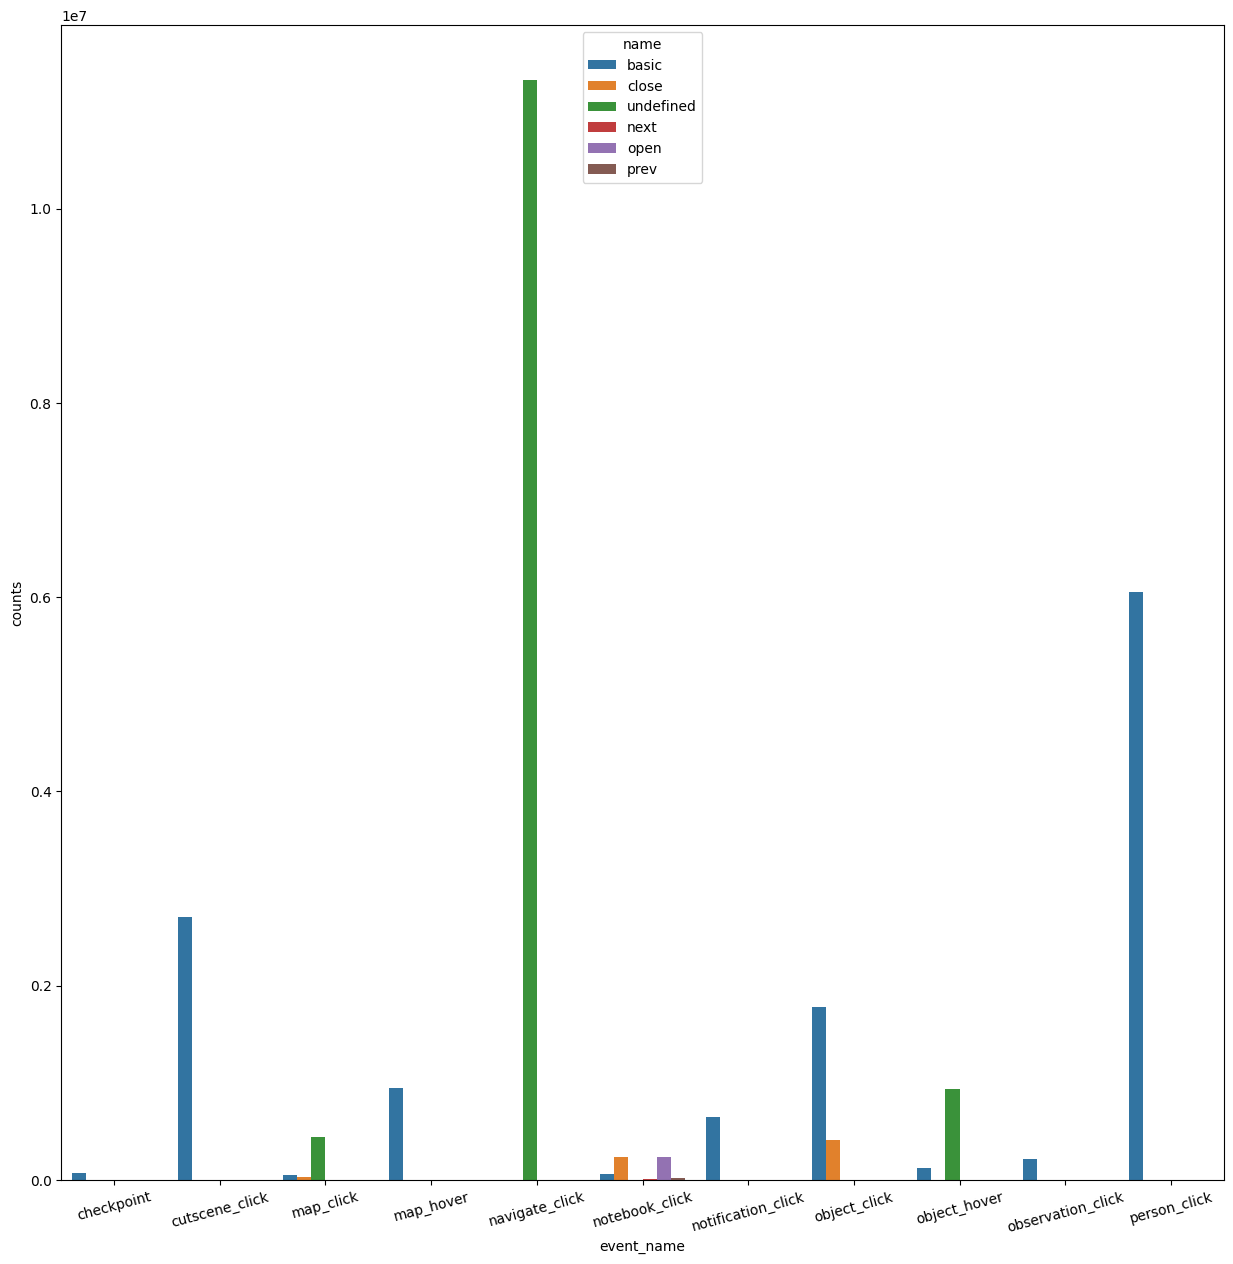

In [35]:
events_counts = train.groupby(['event_name', 'name']).size().reset_index(name='counts')

# Plot the grouped bar chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.barplot(x='event_name', y='counts', hue='name', data=events_counts, ax=ax)
ax.tick_params(axis='x', labelrotation=15);

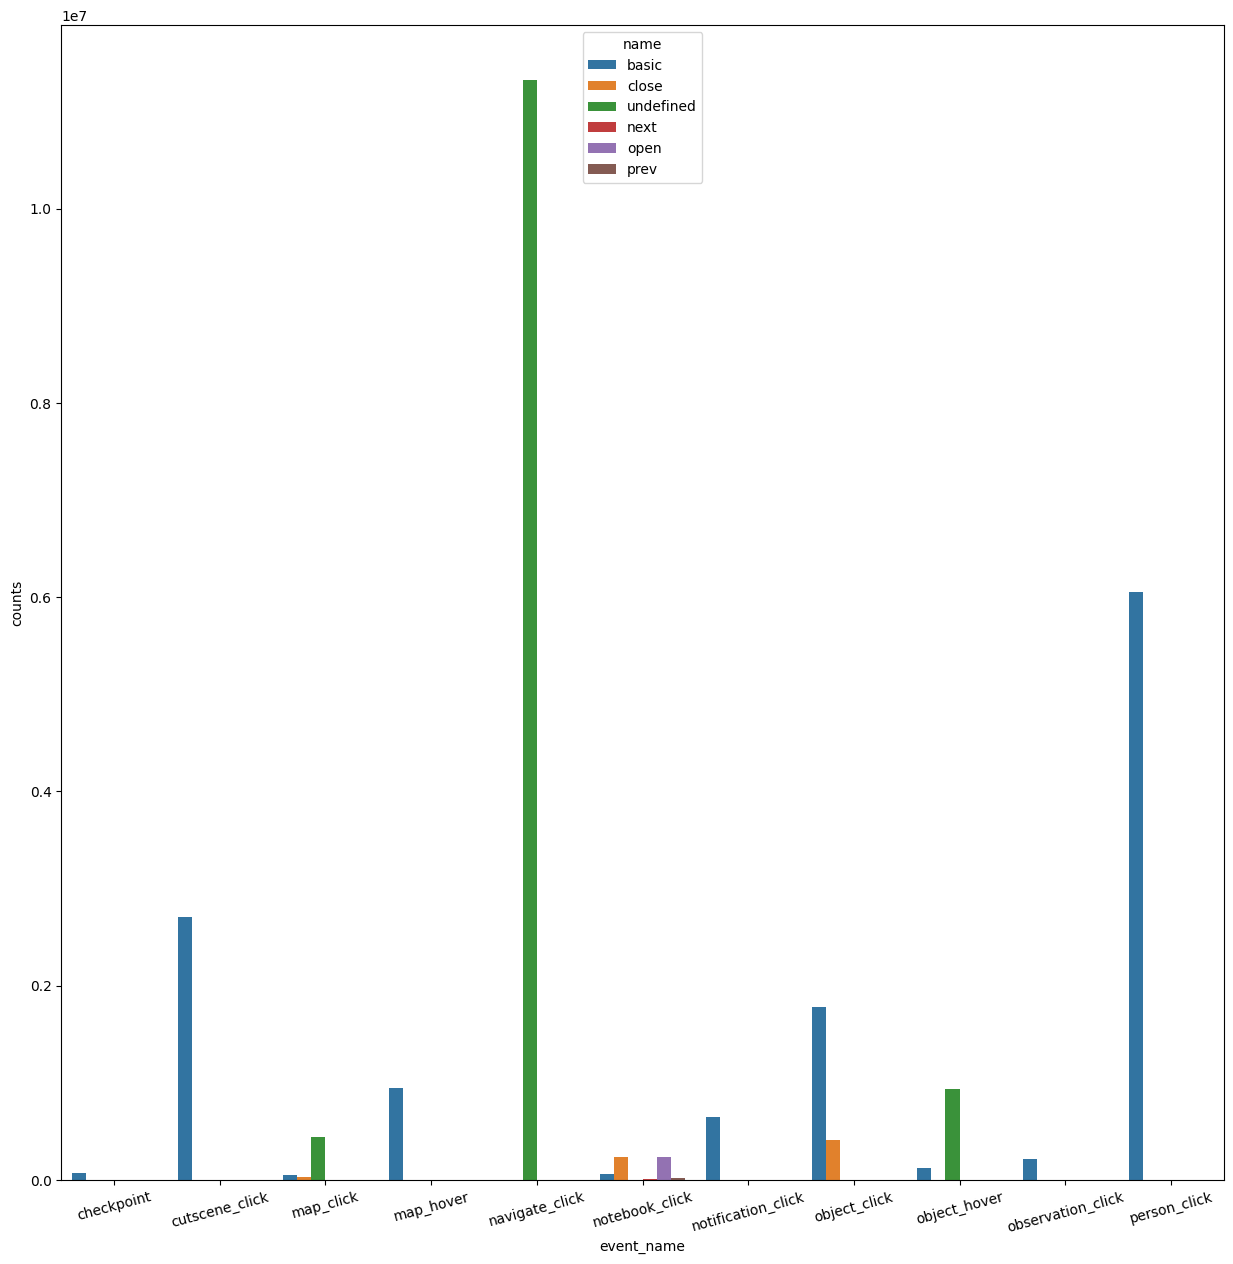

In [36]:
# Group the data and calculate the counts and percentages
events_counts = train.groupby(['event_name', 'name']).size().reset_index(name='counts')
events_counts['percentage'] = events_counts.groupby('event_name', group_keys=False)['counts'].apply(lambda x: x / x.sum() * 100)

# Plot the grouped bar chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))
sns.barplot(x='event_name', y='counts', hue='name', data=events_counts, ax=ax)
ax.tick_params(axis='x', labelrotation=15)
    
plt.show()

In [37]:
events_counts

,event_name,name,counts,percentage
0,checkpoint,basic,71028,100.000000
1,cutscene_click,basic,2703035,100.000000
2,map_click,basic,46087,8.910143
3,map_click,close,28623,5.533773
4,map_click,undefined,442532,85.556084
5,map_hover,basic,945159,100.000000
6,navigate_click,undefined,11326433,100.000000
7,notebook_click,basic,63416,11.233137
8,notebook_click,close,235132,41.649898
9,notebook_click,next,11607,2.055996


most of event_name are event type of basic or undefined. event type prev, close, next open are very low percentage through out whole. Open, prev, next actually only associates with noteboock clicks.
Maybe we just need separate counts for just open, prev, next.

for example, notebook_open, notebook_prev, notebook_next counts. 

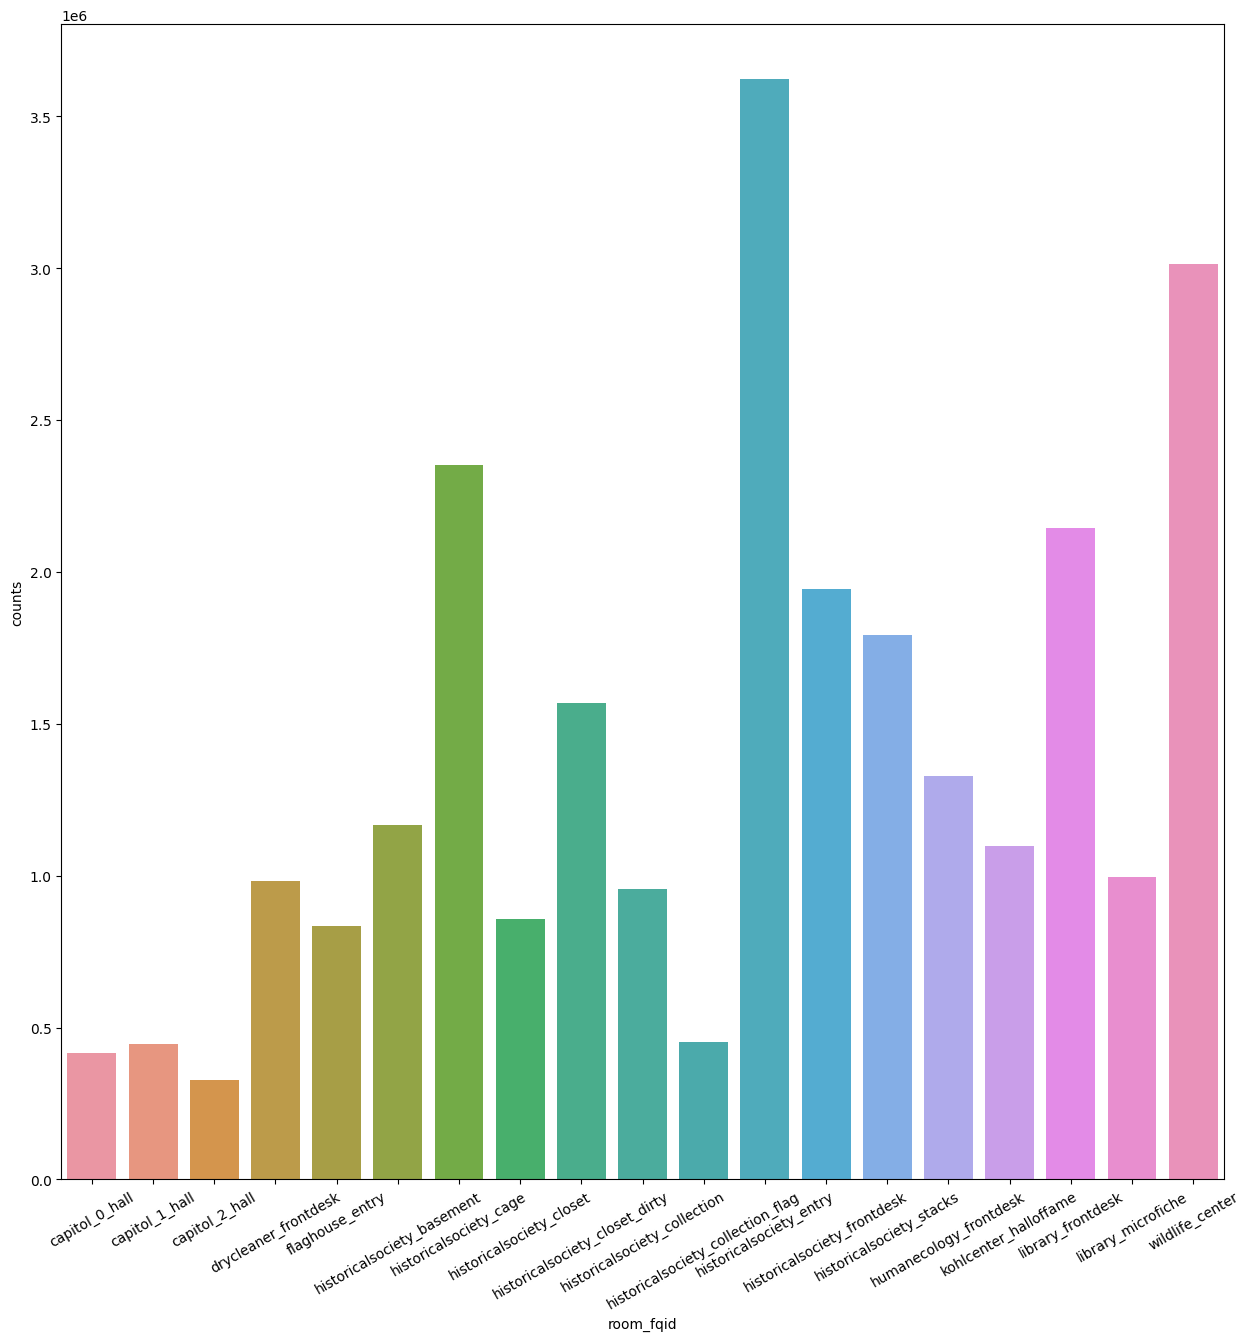

In [42]:
events_counts = train.groupby(['room_fqid']).size().reset_index(name='counts')

# Plot the grouped bar chart using seaborn
fig, ax = plt.subplots(figsize=(15, 15))

sns.barplot(x='room_fqid', y='counts', data=events_counts, ax=ax)
ax.tick_params(axis='x', labelrotation=30);

# EDA through Groupying by

In [78]:
session_levelgroup_eventname = train.groupby(['session_id', 'event_name', 'level_group']).size().reset_index(name='counts')

In [79]:
session_levelgroup_eventname[(session_levelgroup_eventname['level_group'] == '0-4') & (session_levelgroup_eventname['session_id'] == 20090312431273200)]

,session_id,event_name,level_group,counts
0,20090312431273200,checkpoint,0-4,1
3,20090312431273200,cutscene_click,0-4,28
6,20090312431273200,map_click,0-4,2
9,20090312431273200,map_hover,0-4,4
12,20090312431273200,navigate_click,0-4,81
15,20090312431273200,notification_click,0-4,8
18,20090312431273200,object_click,0-4,11
21,20090312431273200,object_hover,0-4,4
24,20090312431273200,observation_click,0-4,4
27,20090312431273200,person_click,0-4,22


In [80]:
levelgroup_eventname_elapsetime = train.groupby(['session_id', 'event_name', 'level_group'])['elapsed_time'].sum().reset_index()

In [81]:
levelgroup_eventname_elapsetime[(levelgroup_eventname_elapsetime['level_group'] == '0-4') & (levelgroup_eventname_elapsetime['session_id'] == 20090312431273200)]

,session_id,event_name,level_group,elapsed_time
0,20090312431273200,checkpoint,0-4,194860
3,20090312431273200,cutscene_click,0-4,1929979
6,20090312431273200,map_click,0-4,298428
9,20090312431273200,map_hover,0-4,593607
12,20090312431273200,navigate_click,0-4,7690626
15,20090312431273200,notification_click,0-4,610653
18,20090312431273200,object_click,0-4,978472
21,20090312431273200,object_hover,0-4,385467
24,20090312431273200,observation_click,0-4,281294
27,20090312431273200,person_click,0-4,1192551


In [82]:
levelgroup_eventname_elapsetime = train.groupby(['session_id', 'event_name', 'level_group'])['elapsed_time'].agg(['sum', 'count']).reset_index()
levelgroup_eventname_elapsetime = levelgroup_eventname_elapsetime.rename(columns={'sum': 'elapsed_time', 'count': 'event_count'})

In [83]:
levelgroup_eventname_elapsetime

,session_id,event_name,level_group,elapsed_time,event_count
0,20090312431273200,checkpoint,0-4,194860,1
1,20090312431273200,checkpoint,13-22,1272679,1
2,20090312431273200,checkpoint,5-12,499235,1
3,20090312431273200,cutscene_click,0-4,1929979,28
4,20090312431273200,cutscene_click,13-22,55868338,60
...,...,...,...,...,...
734424,22100221145014656,observation_click,13-22,18750307,4
734425,22100221145014656,observation_click,5-12,4175854,2
734426,22100221145014656,person_click,0-4,4148879,27
734427,22100221145014656,person_click,13-22,688583854,139


In [84]:
temp = levelgroup_eventname_elapsetime[(levelgroup_eventname_elapsetime['level_group'] == '0-4')]

In [85]:
temp

,session_id,event_name,level_group,elapsed_time,event_count
0,20090312431273200,checkpoint,0-4,194860,1
3,20090312431273200,cutscene_click,0-4,1929979,28
6,20090312431273200,map_click,0-4,298428,2
9,20090312431273200,map_hover,0-4,593607,4
12,20090312431273200,navigate_click,0-4,7690626,81
...,...,...,...,...,...
734414,22100221145014656,notification_click,0-4,1504724,9
734417,22100221145014656,object_click,0-4,5786077,27
734420,22100221145014656,object_hover,0-4,2062808,9
734423,22100221145014656,observation_click,0-4,683848,5


In [86]:
temp['session_id'].nunique()

23562

In [87]:
pivoted = temp.pivot(index='session_id', columns='event_name', values='elapsed_time')

# rename the columns to include '_elapsed_time'
pivoted.columns = [col + '_elapsed_time' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
elapsed_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
elapsed_merged = elapsed_merged.drop(['event_count', 'event_name', 'elapsed_time'], axis=1)

In [88]:
elapsed_merged

,session_id,level_group,checkpoint_elapsed_time,cutscene_click_elapsed_time,map_click_elapsed_time,map_hover_elapsed_time,navigate_click_elapsed_time,notebook_click_elapsed_time,notification_click_elapsed_time,object_click_elapsed_time,object_hover_elapsed_time,observation_click_elapsed_time,person_click_elapsed_time
0,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
1,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
2,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
3,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
4,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235737,22100221145014656,0-4,435055.0,4665100.0,650109.0,647341.0,20630378.0,1747474.0,1504724.0,5786077.0,2062808.0,683848.0,4148879.0
235738,22100221145014656,0-4,435055.0,4665100.0,650109.0,647341.0,20630378.0,1747474.0,1504724.0,5786077.0,2062808.0,683848.0,4148879.0
235739,22100221145014656,0-4,435055.0,4665100.0,650109.0,647341.0,20630378.0,1747474.0,1504724.0,5786077.0,2062808.0,683848.0,4148879.0
235740,22100221145014656,0-4,435055.0,4665100.0,650109.0,647341.0,20630378.0,1747474.0,1504724.0,5786077.0,2062808.0,683848.0,4148879.0


In [89]:
elapsed_merged = elapsed_merged.drop_duplicates()

In [90]:
elapsed_merged

,session_id,level_group,checkpoint_elapsed_time,cutscene_click_elapsed_time,map_click_elapsed_time,map_hover_elapsed_time,navigate_click_elapsed_time,notebook_click_elapsed_time,notification_click_elapsed_time,object_click_elapsed_time,object_hover_elapsed_time,observation_click_elapsed_time,person_click_elapsed_time
0,20090312431273200,0-4,194860.0,1929979.0,298428.0,593607.0,7690626.0,NaN,610653.0,978472.0,385467.0,281294.0,1192551.0
10,20090312433251036,0-4,233752.0,2155126.0,548449.0,485024.0,5260906.0,122504.0,595567.0,2102427.0,755056.0,76360.0,1235874.0
21,20090312455206810,0-4,363226.0,10499493.0,623705.0,621856.0,11939944.0,NaN,1507902.0,1723684.0,317461.0,NaN,2560034.0
30,20090313091715820,0-4,192793.0,1724504.0,232701.0,230518.0,5189605.0,162932.0,458543.0,1212609.0,423510.0,68741.0,1030926.0
41,20090313571836404,0-4,195851.0,1855086.0,459827.0,323280.0,3364292.0,352032.0,617027.0,782086.0,607421.0,NaN,1058686.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235688,22100215342220508,0-4,554635.0,6299292.0,861023.0,1321167.0,14052932.0,336550.0,1983274.0,3083520.0,2615398.0,531833.0,3478600.0
235699,22100215460321130,0-4,355799.0,4040974.0,524158.0,803765.0,8442501.0,1372577.0,1245762.0,3208278.0,1143217.0,230353.0,2165892.0
235710,22100217104993650,0-4,409659.0,3529033.0,693226.0,NaN,21515984.0,816530.0,1425604.0,3030149.0,1597979.0,847438.0,2469026.0
235720,22100219442786200,0-4,191727.0,2564313.0,400791.0,124687.0,7800035.0,721649.0,662043.0,884462.0,431475.0,31730.0,1077518.0


In [91]:
levelgroup_eventname_elapsetime = train.groupby(['session_id', 'event_name', 'level_group'])['elapsed_time'].agg(['sum', 'count']).reset_index()
levelgroup_eventname_elapsetime = levelgroup_eventname_elapsetime.rename(columns={'sum': 'elapsed_time', 'count': 'event_count'})

temp = levelgroup_eventname_elapsetime[(levelgroup_eventname_elapsetime['level_group'] == '0-4')]

In [92]:
pivoted = temp.pivot(index='session_id', columns='event_name', values='event_count')

# rename the columns to include '_elapsed_time'
pivoted.columns = [col + '_counts' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
counts_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
counts_merged = counts_merged.drop(['event_count', 'event_name', 'elapsed_time'], axis=1)

In [93]:
counts_merged

,session_id,level_group,checkpoint_counts,cutscene_click_counts,map_click_counts,map_hover_counts,navigate_click_counts,notebook_click_counts,notification_click_counts,object_click_counts,object_hover_counts,observation_click_counts,person_click_counts
0,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
1,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
2,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
3,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
4,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235737,22100221145014656,0-4,1.0,31.0,2.0,2.0,92.0,6.0,9.0,27.0,9.0,5.0,27.0
235738,22100221145014656,0-4,1.0,31.0,2.0,2.0,92.0,6.0,9.0,27.0,9.0,5.0,27.0
235739,22100221145014656,0-4,1.0,31.0,2.0,2.0,92.0,6.0,9.0,27.0,9.0,5.0,27.0
235740,22100221145014656,0-4,1.0,31.0,2.0,2.0,92.0,6.0,9.0,27.0,9.0,5.0,27.0


In [94]:
counts_merged = counts_merged.drop_duplicates()

In [95]:
counts_merged

,session_id,level_group,checkpoint_counts,cutscene_click_counts,map_click_counts,map_hover_counts,navigate_click_counts,notebook_click_counts,notification_click_counts,object_click_counts,object_hover_counts,observation_click_counts,person_click_counts
0,20090312431273200,0-4,1.0,28.0,2.0,4.0,81.0,NaN,8.0,11.0,4.0,4.0,22.0
10,20090312433251036,0-4,1.0,36.0,3.0,3.0,49.0,2.0,5.0,15.0,5.0,2.0,18.0
21,20090312455206810,0-4,1.0,49.0,2.0,2.0,57.0,NaN,9.0,10.0,1.0,NaN,18.0
30,20090313091715820,0-4,1.0,34.0,2.0,2.0,80.0,2.0,8.0,18.0,5.0,2.0,22.0
41,20090313571836404,0-4,1.0,26.0,3.0,2.0,35.0,4.0,8.0,9.0,5.0,NaN,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
235688,22100215342220508,0-4,1.0,29.0,2.0,3.0,58.0,3.0,9.0,13.0,8.0,3.0,21.0
235699,22100215460321130,0-4,1.0,31.0,2.0,3.0,50.0,7.0,9.0,19.0,5.0,1.0,21.0
235710,22100217104993650,0-4,1.0,28.0,2.0,NaN,104.0,3.0,11.0,15.0,6.0,4.0,23.0
235720,22100219442786200,0-4,1.0,32.0,3.0,1.0,81.0,6.0,8.0,9.0,5.0,1.0,20.0


In [128]:
room_elapsetime = train.groupby(['session_id', 'room_fqid', 'level_group'])['elapsed_time'].agg(['sum']).reset_index()
room_elapsetime = room_elapsetime.rename(columns={'sum': 'elapsed_time'})

temp = room_elapsetime[(room_elapsetime['level_group'] == '0-4')]
temp

,session_id,room_fqid,level_group,elapsed_time
0,20090312431273200,capitol_0_hall,0-4,358883
7,20090312431273200,historicalsociety_basement,0-4,647973
11,20090312431273200,historicalsociety_closet,0-4,1997034
13,20090312431273200,historicalsociety_collection,0-4,2740665
15,20090312431273200,historicalsociety_entry,0-4,3020968
...,...,...,...,...
725847,22100221145014656,historicalsociety_closet,0-4,1890646
725850,22100221145014656,historicalsociety_collection,0-4,12215119
725853,22100221145014656,historicalsociety_entry,0-4,8038068
725858,22100221145014656,historicalsociety_stacks,0-4,3458154


In [129]:
pivoted = temp.pivot(index='session_id', columns='room_fqid', values='elapsed_time')

# rename the columns to include '_elapsed_time'
pivoted.columns = [col + '_elapsed_time' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
room_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
room_merged = room_merged.drop(['room_fqid', 'elapsed_time'], axis=1)
room_merged.drop_duplicates()

,session_id,level_group,capitol_0_hall_elapsed_time,historicalsociety_basement_elapsed_time,historicalsociety_closet_elapsed_time,historicalsociety_collection_elapsed_time,historicalsociety_entry_elapsed_time,historicalsociety_stacks_elapsed_time,kohlcenter_halloffame_elapsed_time
0,20090312431273200,0-4,358883.0,647973.0,1997034.0,2740665.0,3020968.0,437814.0,4952600.0
7,20090312433251036,0-4,430095.0,25243.0,137900.0,3928431.0,3261863.0,NaN,5787513.0
13,20090312455206810,0-4,697708.0,457503.0,492551.0,8512383.0,12651071.0,NaN,7346089.0
19,20090313091715820,0-4,624416.0,207038.0,599352.0,2358171.0,3326632.0,NaN,3811773.0
25,20090313571836404,0-4,359782.0,41482.0,523586.0,2766420.0,2288752.0,NaN,3635566.0
...,...,...,...,...,...,...,...,...,...
150967,22100215342220508,0-4,1508693.0,391870.0,2546683.0,9987821.0,6578445.0,1074561.0,13030151.0
150974,22100215460321130,0-4,642191.0,227899.0,1043982.0,8099115.0,4339221.0,690759.0,8490109.0
150981,22100217104993650,0-4,778907.0,812923.0,1893516.0,5901150.0,11283932.0,4295882.0,11368318.0
150988,22100219442786200,0-4,344879.0,62890.0,1119309.0,3613892.0,4801001.0,NaN,4948459.0


In [96]:
notebook_events = train.groupby(['session_id', 'event_name', 'level_group', 'name'])['elapsed_time'].agg(['count']).reset_index()
notebook_events = notebook_events.rename(columns={'count': 'event_count'})

In [111]:
notebook_events[(notebook_events['event_name'] == 'notebook_click') & (notebook_events['name'].isin(['open', 'prev', 'next']))]

,session_id,event_name,level_group,name,event_count
57,20090312433251036,notebook_click,0-4,close,1
58,20090312433251036,notebook_click,0-4,open,1
60,20090312433251036,notebook_click,13-22,close,19
61,20090312433251036,notebook_click,13-22,next,1
62,20090312433251036,notebook_click,13-22,open,19
...,...,...,...,...,...
981155,22100221145014656,notebook_click,13-22,open,9
981157,22100221145014656,notebook_click,5-12,close,7
981158,22100221145014656,notebook_click,5-12,next,3
981159,22100221145014656,notebook_click,5-12,open,7


In [113]:
temp = notebook_events[(notebook_events['level_group'] == '0-4') & (notebook_events['name'].isin(['open', 'prev', 'next']))]

pivoted = temp.pivot(index='session_id', columns='name', values='event_count')

# rename the columns to include '_elapsed_time'
pivoted.columns = ['notebook_' + col + '_counts' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
notebooks_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
notebooks_merged = notebooks_merged.drop(['event_count', 'event_name', 'name'], axis=1)

In [114]:
notebooks_merged

,session_id,level_group,notebook_next_counts,notebook_open_counts,notebook_prev_counts
0,20090312433251036,0-4,NaN,1.0,NaN
1,20090313091715820,0-4,NaN,1.0,NaN
2,20090313571836404,0-4,NaN,2.0,NaN
3,20090314035813970,0-4,NaN,4.0,NaN
4,20090314121766812,0-4,NaN,4.0,NaN
...,...,...,...,...,...
15387,22100215342220508,0-4,NaN,1.0,NaN
15388,22100215460321130,0-4,NaN,3.0,NaN
15389,22100217104993650,0-4,NaN,1.0,NaN
15390,22100219442786200,0-4,NaN,3.0,NaN


There are limited information we can get with just eda. We need to see the target to see.
Target however has the information of questions and correct only.
Maybe what we can do is to group the lables by below
- 0-4: question 1-3
- 5-12: question 4-13
- 13-22: question 14-18
And then see how many they got right for each questions.

In [ ]:
labels_copy = labels.copy()

In [ ]:
labels_copy

,session_id,correct,question_number
0,20090312431273200,1,q1
1,20090312433251036,0,q1
2,20090312455206810,1,q1
3,20090313091715820,0,q1
4,20090313571836404,1,q1
...,...,...,...
424111,22100215342220508,1,q18
424112,22100215460321130,1,q18
424113,22100217104993650,1,q18
424114,22100219442786200,1,q18


In [ ]:
def set_level_group(row):
    if row['question_number'] in ['q1', 'q2', 'q3']:
        return '0-4'
    elif row['question_number'] in ['q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q11', 'q12', 'q13']:
        return '5-12'
    else:
        return '13-22'

In [ ]:
labels_copy['level_group'] = labels_copy.apply(set_level_group, axis=1)

In [ ]:
labels_copy

,session_id,correct,question_number,level_group
0,20090312431273200,1,q1,0-4
1,20090312433251036,0,q1,0-4
2,20090312455206810,1,q1,0-4
3,20090313091715820,0,q1,0-4
4,20090313571836404,1,q1,0-4
...,...,...,...,...
424111,22100215342220508,1,q18,13-22
424112,22100215460321130,1,q18,13-22
424113,22100217104993650,1,q18,13-22
424114,22100219442786200,1,q18,13-22


In [ ]:
question_numbers = ['q1', 'q2', 'q3', 'q4', 'q5', 'q6', 'q7', 'q8', 'q9', 'q10', 'q11', 'q12', 'q13', 'q2', 'q2', 'q16', 'q17', 'q18']

In [ ]:
labels_copy['question_number'] = labels_copy['question_number'].apply(lambda x: int(x[1:]))

In [ ]:
labels_copy

,session_id,correct,question_number,level_group
0,20090312431273200,1,1,0-4
1,20090312433251036,0,1,0-4
2,20090312455206810,1,1,0-4
3,20090313091715820,0,1,0-4
4,20090313571836404,1,1,0-4
...,...,...,...,...
424111,22100215342220508,1,18,13-22
424112,22100215460321130,1,18,13-22
424113,22100217104993650,1,18,13-22
424114,22100219442786200,1,18,13-22


In [ ]:
levelgroup_eventname_elapsetime = train.groupby(['session_id', 'event_name', 'level_group'])['elapsed_time'].agg(['sum', 'count']).reset_index()


In [117]:
grouped_bins = train.groupby(['session_id', 'level_group'])['fullscreen','hq', 'music'].sum().reset_index()

C:\Users\Yuchie\AppData\Local\Temp\ipykernel_32812\1896373899.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  grouped_bins = train.groupby(['session_id', 'level_group'])['fullscreen','hq', 'music'].sum().reset_index()


In [118]:
grouped_bins[grouped_bins['level_group'] == '0-4']

,session_id,level_group,fullscreen,hq,music
0,20090312431273200,0-4,0,0,165
3,20090312433251036,0-4,0,0,0
6,20090312455206810,0-4,149,149,149
9,20090313091715820,0-4,176,176,176
12,20090313571836404,0-4,0,0,112
...,...,...,...,...,...
70671,22100215342220508,0-4,150,0,150
70674,22100215460321130,0-4,0,0,149
70677,22100217104993650,0-4,0,0,197
70680,22100219442786200,0-4,0,0,167


In [121]:
level_grouped = train.groupby(['session_id', 'level', 'level_group'])['level'].agg(['count']).reset_index()
level_grouped = level_grouped.rename(columns={'count': 'level_counts'})
level_grouped

,session_id,level,level_group,level_counts
0,20090312431273200,0,0-4,28
1,20090312431273200,1,0-4,32
2,20090312431273200,2,0-4,39
3,20090312431273200,3,0-4,53
4,20090312431273200,4,0-4,13
...,...,...,...,...
541337,22100221145014656,18,13-22,205
541338,22100221145014656,19,13-22,62
541339,22100221145014656,20,13-22,41
541340,22100221145014656,21,13-22,163


In [124]:
temp = level_grouped[(level_grouped['level_group'] == '0-4')]

pivoted = temp.pivot(index='session_id', columns='level', values='level_counts')

# rename the columns to include '_elapsed_time'
pivoted.columns = ['level_' + str(col) + '_counts' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
level_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
level_merged = level_merged.drop(['level', 'level_counts'], axis=1)

In [126]:
level_merged.drop_duplicates()

,session_id,level_group,level_0_counts,level_1_counts,level_2_counts,level_3_counts,level_4_counts
0,20090312431273200,0-4,28,32,39,53,13
5,20090312433251036,0-4,23,34,32,38,12
10,20090312455206810,0-4,32,42,42,19,14
15,20090313091715820,0-4,31,46,42,43,14
20,20090313571836404,0-4,27,19,31,23,12
...,...,...,...,...,...,...,...
117785,22100215342220508,0-4,38,29,40,30,13
117790,22100215460321130,0-4,29,24,47,33,16
117795,22100217104993650,0-4,28,31,34,94,10
117800,22100219442786200,0-4,38,25,45,38,21


In [63]:
levelgroup_eventname_hoverduration = train.groupby(['session_id', 'event_name', 'level_group'])['hover_duration'].agg(['sum', 'count']).reset_index()
levelgroup_eventname_hoverduration = levelgroup_eventname_hoverduration.rename(columns={'sum': 'hover_duration', 'count': 'event_count'})

In [65]:
levelgroup_eventname_hoverduration[levelgroup_eventname_hoverduration['hover_duration'] > 0]

,session_id,event_name,level_group,hover_duration,event_count
9,20090312431273200,map_hover,0-4,518.0,4
10,20090312431273200,map_hover,13-22,3598.0,14
11,20090312431273200,map_hover,5-12,2533.0,9
21,20090312431273200,object_hover,0-4,18598.0,4
22,20090312431273200,object_hover,13-22,20700.0,13
...,...,...,...,...,...
734406,22100221145014656,map_hover,13-22,27964.0,65
734407,22100221145014656,map_hover,5-12,3539.0,12
734420,22100221145014656,object_hover,0-4,45226.0,9
734421,22100221145014656,object_hover,13-22,28901.0,20


In [67]:
temp = levelgroup_eventname_hoverduration[levelgroup_eventname_hoverduration['hover_duration'] > 0]

In [70]:
temp = temp[temp['level_group'] == '0-4']

In [73]:
temp

,session_id,event_name,level_group,hover_duration,event_count
9,20090312431273200,map_hover,0-4,518.0,4
21,20090312431273200,object_hover,0-4,18598.0,4
39,20090312433251036,map_hover,0-4,853.0,3
54,20090312433251036,object_hover,0-4,10177.0,5
72,20090312455206810,map_hover,0-4,1036.0,2
...,...,...,...,...,...
734354,22100217104993650,object_hover,0-4,16594.0,6
734372,22100219442786200,map_hover,0-4,1067.0,1
734387,22100219442786200,object_hover,0-4,18958.0,5
734405,22100221145014656,map_hover,0-4,585.0,2


In [71]:
pivoted = temp.pivot(index='session_id', columns='event_name', values='hover_duration')

# rename the columns to include '_elapsed_time'
pivoted.columns = [col + '_duration' for col in pivoted.columns]

# reset the index so that 'session_id' becomes a regular column
pivoted = pivoted.reset_index()

# merge the original dataframe with the pivoted dataframe
hover_merged = pd.merge(temp, pivoted, on='session_id')

# drop the 'elapsed_time' column since it's no longer needed
hover_merged = hover_merged.drop(['event_count', 'event_name', 'hover_duration'], axis=1)

In [74]:
hover_merged.drop_duplicates()

,session_id,level_group,map_hover_duration,object_hover_duration
0,20090312431273200,0-4,518.0,18598.0
2,20090312433251036,0-4,853.0,10177.0
4,20090312455206810,0-4,1036.0,8401.0
6,20090313091715820,0-4,1883.0,11537.0
8,20090313571836404,0-4,916.0,10149.0
...,...,...,...,...
41008,22100215342220508,0-4,636.0,29468.0
41010,22100215460321130,0-4,1101.0,10413.0
41012,22100217104993650,0-4,NaN,16594.0
41013,22100219442786200,0-4,1067.0,18958.0


counts: fullscreen, hq, music, event_name, level

elapsed time: event_names, room_fqid

hover_duration: map_hover and object_hover

name: for notebook only counts of open, prev, next

for baseline models, below features are eliminated:
- coordinates
- text & text fqid
- fqid -> too many and need some grouping and need to find some relationhips.
- page -> seems like lots missing it may cause sparsity